# Filtros de Haar

Los kernels funcionan, pero no reconoce bordes gruesos.

Entonces esta solucion propone utilizar varios kernels que tengan distintas formas y tamanios. De esta forma encuentra bordes distintos.

Dichas caracteristicas pueden no ser bordes, sino sombras, como facciones de una cara.

## Debilidades

- Media sensible al ruido.
- Es costoso

## Compute it

- Se resuelve con imagen integral:
    
    Concepto sencillo, donde cada pixel es la suma de todos los valores hacia la izquierda y arriba

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

(1600, 737)

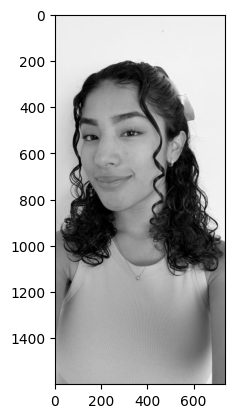

In [89]:
img = cv2.imread("data/Sarita.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap = "gray")
img = img/255
img.shape

In [90]:
iImg = np.zeros_like(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        s = img[i, j]
        if i: s += iImg[i - 1][j]
        if j: s += iImg[i][j - 1]
        if j and i: s -= iImg[i - 1, j - 1]
        iImg[i, j] = s

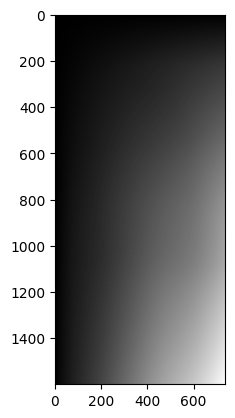

In [91]:
plt.imshow(iImg, cmap = "gray")

111000

111000

111000

In [92]:
threshold = 0.20
new = np.zeros_like(img)
for i in range(iImg.shape[0]):
    for j in range(iImg.shape[1]):
        if i + 2 < iImg.shape[0] and j + 5 < iImg.shape[1]:
            sOnes = iImg[i + 2, j + 2]
            if i: sOnes -= iImg[i - 1, j + 2]
            if j: sOnes -= iImg[i + 2, j - 1]
            if i and j: sOnes += iImg[i - 1, j - 1]
            sOnes /= 9

            sZeros = iImg[i + 2, j + 5]
            if i: sZeros -= iImg[i - 1, j + 5]
            sZeros -= iImg[i + 2, j + 2]
            if i: sZeros += iImg[i - 1, j + 2]
            sZeros /= 9

            d = np.abs(sOnes - sZeros)
            if d > threshold: new[i, j] = 1

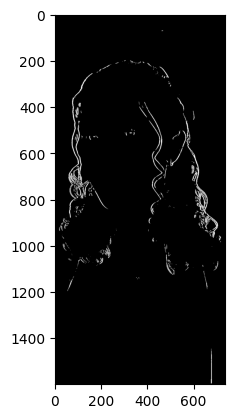

In [93]:
plt.imshow(new, cmap = "gray")